In [1]:
# alcohol consumed on NYE > hangover, time to back to normal, advil

# y = mx + b
# y = b0 + b1*x
# y = 0 + 1/4 * 8 

import numpy as np
import pandas as pd
import altair as alt

size = 10000
x = np.random.poisson(lam=8, size=size)
y = 0 + 1/6 * x + np.random.normal(0, 1, size=size)
y = y.round()
y = [max(yi, 0) for yi in y]

In [2]:
df = pd.DataFrame({'drinks': x, 'advil': y})

In [3]:
alt.Chart(df.sample(5000)).mark_circle(opacity=1/10).encode(x='drinks', y='advil')

alt.Chart(...)

In [4]:
y = df['advil']
X = df[['drinks']]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model.score(X_train, y_train)
model.score(X_test, y_test)

0.20034039512043667

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
y_test_hat = model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test, y_test_hat))

0.9570289036423061

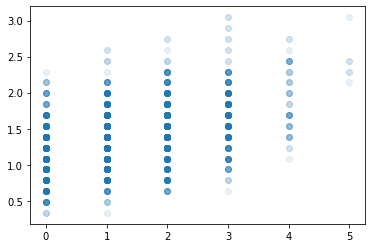

In [12]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(y_test, y_test_hat, alpha=1/10)